In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# to make plots match dark theme in jupyter lab
plt.style.use('dark_background')

In [2]:
df1 = pd.read_csv('data/Metro_Zhvi_SingleFamilyResidence.csv')

In [3]:
df1.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,102001,United States,0,106409.0,106560.0,106737.0,106910.0,107128.0,107351.0,107614.0,...,238053,238779,239549,240338,241143,241961,242760,243578,244440,245386
1,394913,"New York, NY",1,189376.0,189043.0,188739.0,188553.0,188461.0,188504.0,188629.0,...,475533,475912,476471,477020,477381,477515,477746,478297,479081,479971
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,192140.0,192143.0,192208.0,192359.0,192348.0,192275.0,192216.0,...,685436,686283,687894,690303,693953,697273,700235,704585,710138,718974
3,394463,"Chicago, IL",3,162321.0,161707.0,161373.0,160886.0,161449.0,162263.0,163930.0,...,243265,243491,243848,244063,244154,244153,244137,244226,244415,244624
4,394514,"Dallas-Fort Worth, TX",4,113140.0,113481.0,113727.0,113913.0,114131.0,114357.0,114688.0,...,252542,253044,253660,254304,255076,255509,255856,255972,256267,256718


In [ ]:
df1.shape

In [4]:
# Lets remove United States and focus on city and state
state_df = df1.iloc[1:, :].copy()

In [6]:
# Drop unneeded columns
state_df.drop(['RegionID', 'SizeRank'], inplace=True, axis=1)

In [7]:
# make YY-MM columns start on the first to make our lives easier
state_df.rename(dict(zip(state_df.columns[1:], [f'{c}-01' for c in state_df.columns[1:]])), 
                inplace=True, axis='columns')

In [8]:
# Split RegionName into city and state
state_df['City'] =  [x.split(', ')[0] for x in state_df['RegionName']]
state_df['State'] = [y.split(', ')[1] for y in state_df['RegionName']]
state_df.drop(['RegionName'], inplace=True, axis=1)

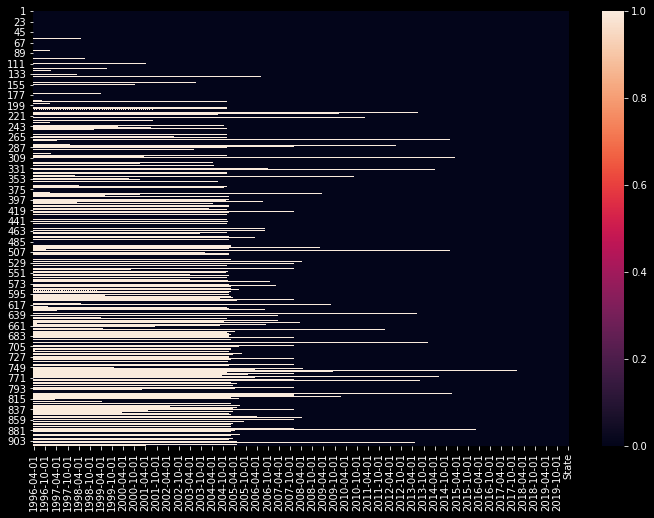

In [9]:
# Lets see the null values
plt.figure(figsize=(12, 8))
sns.heatmap(state_df.isna());

In [10]:
state_df.set_index('City', inplace=True)

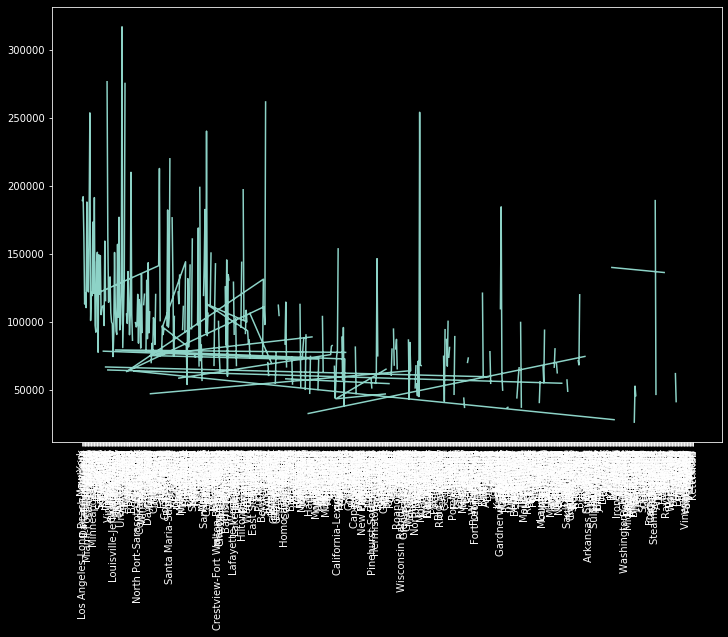

In [11]:
plt.figure(figsize=(12, 8))
plt.plot(state_df.iloc[:, 0])
plt.xticks(rotation=90);

In [62]:
# Make time series by state code
def state_df_maker(state_code):
    if type(state_code) != str:
        type(state_code) == str
    state_data = state_df[state_df['State'] == state_code.upper()].copy()
    state_data.reset_index(inplace=True)
    state_data = state_data.transpose()
    state_data.columns = state_data.iloc[0]
    state_data.drop(state_data.index[0], inplace=True)
    # convert to numeric, ignore the NaNs
    state_data.apply(pd.to_numeric, errors='ignore')
    print(state_data.dtypes)
    # TODO: Convert index to date_time
    # We dont need the state code
    return state_data[:-1]
#     ohio_df.head()

In [65]:
ohio_df = state_df_maker('OH')
# ohio_df.head()

City
Cincinnati                object
Cleveland                 object
Columbus                  object
Dayton                    object
Akron                     object
Toledo                    object
Youngstown                object
Canton                    object
Wheeling                  object
Springfield               object
Mansfield                 object
Weirton                   object
Wooster                   object
Salem                     object
Lima                      object
Ashtabula                 object
New Philadelphia          object
Zanesville                object
Portsmouth                object
Chillicothe               object
Sandusky                  object
Findlay                   object
Marion                    object
Athens                    object
Marietta                  object
Fremont                   object
Mount Vernon              object
Norwalk                   object
Tiffin                    object
Ashland                   object
Green

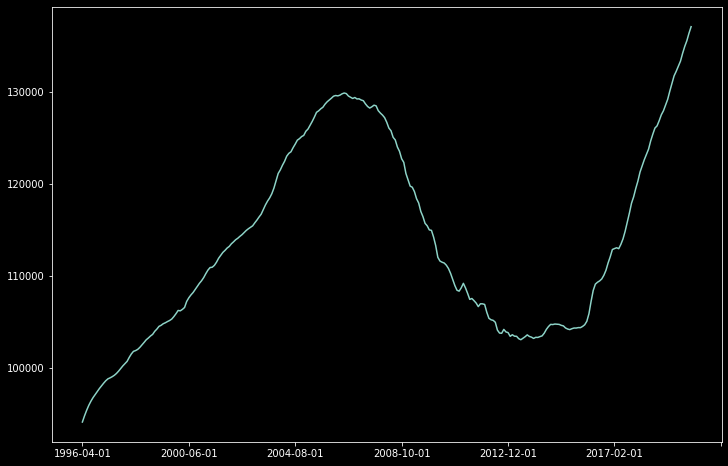

In [73]:
plt.figure(figsize=(12, 8))
ohio_df['Dayton'][:-1].plot()